# Facial Keypoint Detection

---

In this project, I combine my knowledge of computer vision techniques and deep learning to build an end-to-end facial keypoint recognition system. Facial keypoints include points around the eyes, nose, and mouth on any face and are used in many applications, from facial tracking to emotion recognition. 

**Part 1** : Investigating OpenCV, pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

* [Step 5](#step5): Create a CNN to Recognize Facial Keypoints
* [Step 6](#step6): Compile and Train the Model
* [Step 7](#step7): Visualize the Loss

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

* [Step 8](#step7): Build a Robust Facial Keypoints Detector (Complete the CV Pipeline)



---
<a id='step0'></a>
## Step 0: Detect Faces Using a Haar Cascade Classifier

Have you ever wondered how Facebook automatically tags images with your friends' faces?   Or how high-end cameras automatically find and focus on a certain person's face?  Applications like these depend heavily on the machine learning task known as *face detection* -  which is the task of automatically finding faces in images containing people.  

At its root face detection is a classification problem - that is a problem of distinguishing between distinct classes of things.  With face detection these distinct classes are 1) images of human faces and 2) everything else. 

I will use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  I have downloaded one of these detectors and stored it in the `detector_architectures` directory.


### Import Resources 

In the next python cell, we load in the required libraries for this section of the project.

In [1]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from PIL import Image
import time
import pandas as pd

Next, we load in and display a test image for performing face detection.

*Note*: by default OpenCV assumes the ordering of our image's color channels are Blue, then Green, then Red.  This is slightly out of order with most image types we'll use in these experiments, whose color channels are ordered Red, then Green, then Blue.  In order to switch the Blue and Red channels of our test image around we will use OpenCV's ```cvtColor``` function, which you can read more about by [checking out some of its documentation located here](http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html).  This is a general utility function that can do other transformations too like converting a color image to grayscale, and transforming a standard color image to HSV color space.

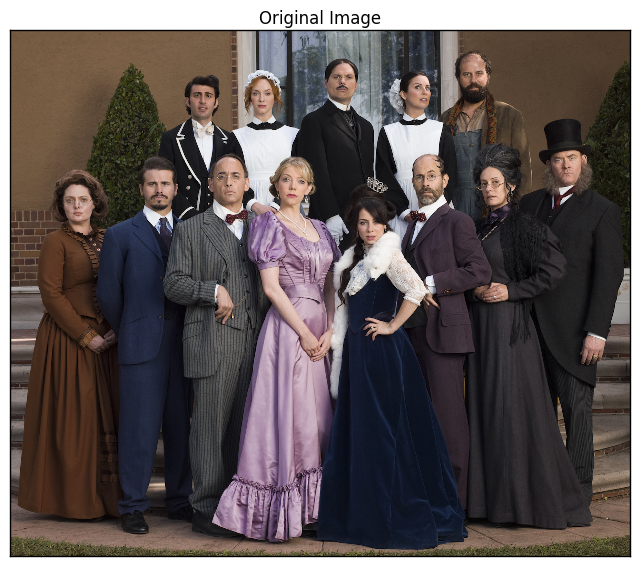

In [2]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

There are a lot of people - and faces - in this picture.  13 faces to be exact!  In the next code cell, I will demonstrate how to use a Haar Cascade classifier to detect all the faces in this test image.

This face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions. So, to use this face detector, I'll first convert the image from color to grayscale. 

Then, I'll load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on the image to find faces! 

To learn more about the parameters of the detector see [this post](https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters).

Number of faces detected: 13


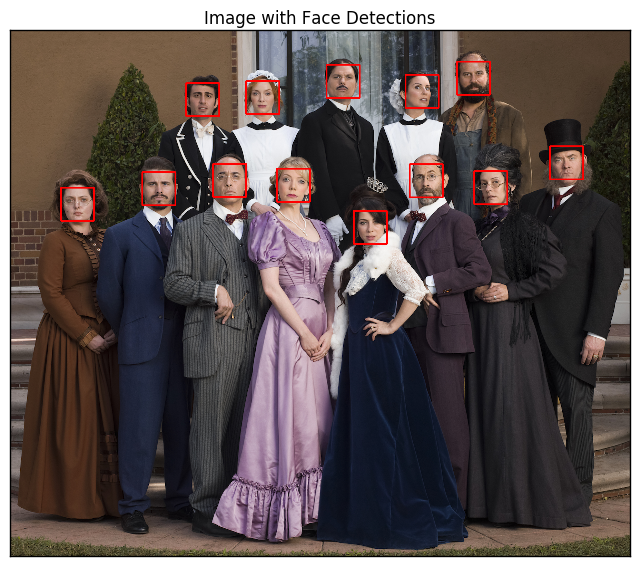

In [3]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

---
<a id='step1'></a>

## Step 1: Add Eye Detections

There are other pre-trained detectors available that use a Haar Cascade Classifier - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here](https://github.com/opencv/opencv/tree/master/data/haarcascades). 

To test the eye detector, I'll first read in a new test image with just a single face.

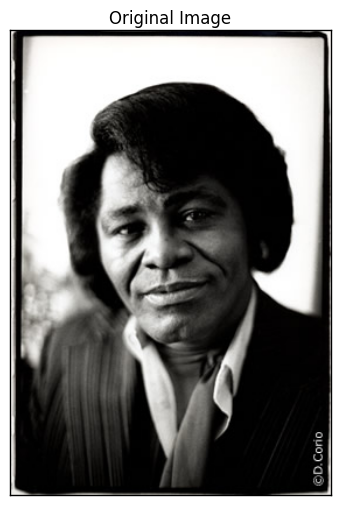

In [4]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Notice that even though the image is a black and white image, we have read it in as a color image and so it will still need to be converted to grayscale in order to perform the most accurate face detection.

So, the next steps will be to convert this image to grayscale, then load OpenCV's face detector and run it with parameters that detect this face accurately.

In [5]:
# Convert the RGB  image to grayscale

# Extract the pre-trained face detector from an xml file

# Detect the faces in image

# Print the number of faces detected in the image

# Make a copy of the orginal image to draw face detections on

# Get the bounding box for each detected face

# Display the image with the detections

### Add an eye detector to the current face detection setup.  

To set up an eye detector, I'll use the stored parameters of the eye cascade detector, called ```haarcascade_eye.xml```, located in the `detector_architectures` subdirectory.  In the next code cell, I'll create the eye detector and store its detections.

In [6]:
# Make a copy of the original image to plot rectangle detections 

# Loop over the detections and draw their corresponding face detection boxes

# Print the number of faces detected in the image

# Extract the pre-trained eye detector from an xml file

# Detect the faces in image

# Print the number of eyes detected in the image

# Loop over the eye detections and draw their corresponding boxes in green on image_with_detections

# Plot the image with both faces and eyes detected

---
<a id='step2'></a>

## Step 2: De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This sort of cleaning - referred to as *pre-processing* - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

In this subsection I'll explore OpenCV's noise-removal functionality to see how well it can clean up a noisy image, which can then be fed into our trained face detector.

### Create a noisy image to work with

In the next cell, I'll create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

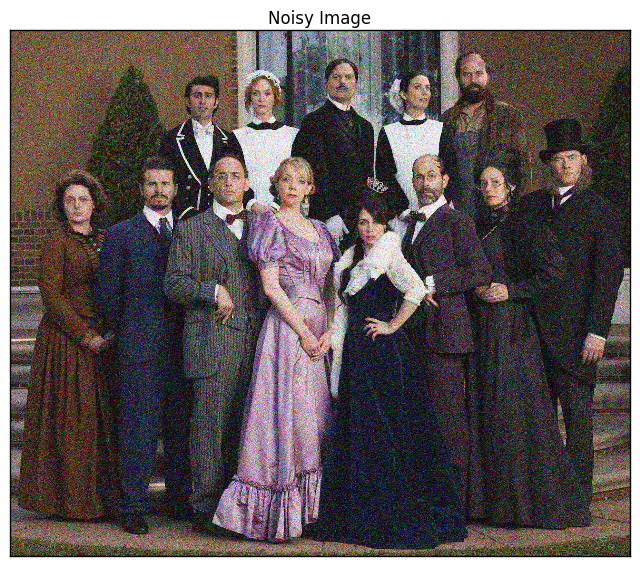

In [7]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

In the next cell we apply the same trained OpenCV detector with the same settings as before, to see what sort of detections we get.

In [8]:
# Convert the RGB  image to grayscale

# Extract the pre-trained face detector from an xml file

# Detect the faces in image

# Print the number of faces detected in the image

# Make a copy of the orginal image to draw face detections on

# Get the bounding box for each detected face

# Display the image with the detections

### De-noise this image for better face detection

Time to get our hands dirty: using OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` - I'll now de-noise this image enough so that all the faces in the image are properly detected.  Once the image has been cleaned in the next cell, I'll use the cell that follows to run our trained face detector over the cleaned image to check out its detections.

You can find its [official documentation here]([documentation for denoising](http://docs.opencv.org/trunk/d1/d79/group__photo__denoise.html#ga21abc1c8b0e15f78cd3eff672cb6c476) and [a useful example here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html).

In [9]:
## TODO: Use OpenCV's built in color image de-noising function to clean up our noisy image!

# Display the image with denoise applied

In [10]:
## Run the face detector on the de-noised image to improve detections and display the result

# Convert the RGB  image to grayscale

# Detect the faces in image

# Print the number of faces detected in the image

# Make a copy of the orginal image to draw face detections on

# Get the bounding box for each detected face 

# Display the image with the detections

---
<a id='step3'></a>

## Step 3: Blur an Image and Perform Edge Detection

Now that we have developed a simple pipeline for detecting faces using OpenCV - let's start playing around with a few fun things we can do with all those detected faces!

### Importance of Blur in Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.

Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information.  And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative).  So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that.  

Below is an animated gif showing the result of an edge-detected cat [taken from Wikipedia](https://en.wikipedia.org/wiki/Gaussian_blur#Common_uses), where the image is gradually blurred more and more prior to edge detection.  When the animation begins you can't quite make out what it's a picture of, but as the animation evolves and local structures are removed via blurring the cat becomes visible in the edge-detected image.

<img src="images/Edge_Image.gif" width=400 height=300/>

Edge detection is a **convolution** performed on the image itself, and you can read about Canny edge detection on [this OpenCV documentation page](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html).

### Canny edge detection

In the cell below I load in a test image, then apply *Canny edge detection* on it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

In [11]:
# Load in the image

# Convert to RGB colorspace

# Convert to grayscale

# Perform Canny edge detection

# Dilate the image to amplify edges

# Plot the RGB and edge-detected image

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector.

### Blur the image *then* perform edge detection

In the next cell, I'll repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

I'll blur the image by using OpenCV's ```filter2d``` functionality - which is discussed in [this documentation page](http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html)

In [12]:
## Blur the test image using OpenCV's filter2d functionality

# Perform Canny edge detection on blurred image

# Dilate the image to amplify edges

# Plot the RGB and edge-detected image

---
<a id='step4'></a>

## Step 4: Automatically Hide the Identity of an Individual

If you film something like a documentary or reality TV, you must get permission from every individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)!  This is also true for projects like [Google's StreetView maps](https://www.google.com/streetview/) - an enormous collection of mapping images taken from a fleet of Google vehicles.  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.  Here's a few examples of folks caught in the camera of a Google street view vehicle.

<img src="images/streetview_example_1.jpg" width=400 height=300/>
<img src="images/streetview_example_2.jpg" width=400 height=300/>


### Read in an image to perform identity detection

Let's try this out for ourselves.

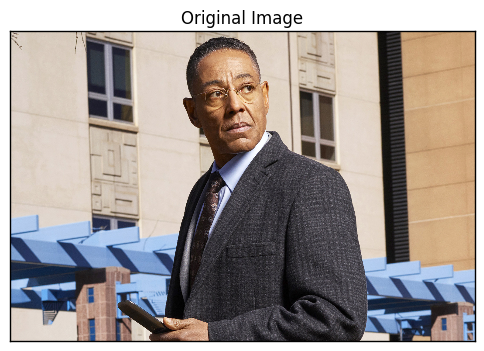

In [13]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

### Use blurring to hide the identity of an individual in an image

The idea here is to 1) automatically detect the face in this image, and then 2) blur it out!

In [14]:
# Convert the RGB  image to grayscale

# Extract the pre-trained face detector from an xml file

# Detect the faces in image

# Print the number of faces detected in the image

# Make a copy of the orginal image to draw face detections on

# Get the bounding box for each detected face

# Display the image with the detections

# Blur the bounding box around each detected face using an averaging filter and display the result

---
<a id='step5'></a>

## Step 5: Create a CNN to Recognize Facial Keypoints

OpenCV is often used in practice with other machine learning and deep learning libraries to produce interesting results.  In this stage of the project I will create my own end-to-end pipeline - employing convolutional networks in keras along with OpenCV - to apply a "selfie" filter to streaming video and images.  

I will start by creating and then training a convolutional network that can detect facial keypoints in a small dataset of cropped images of human faces.  What are facial keypoints?  Let's take a look at some examples.

<img src="images/keypoints_test_results.png" width=400 height=300/>

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.  Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

### Make a facial keypoint detector

But first things first: how can we make a facial keypoint detector?  Well, at a high level, notice that facial keypoint detection is a *regression problem*.  A single face corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because our input data are images, we can employ a *convolutional neural network* to recognize patterns in our images and learn how to identify these keypoint given sets of labeled data.

In order to train a regressor, we need a training set - a set of facial image / facial keypoint pairs to train on.  For this I'll be using [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data). I've already downloaded this data and placed it in the `data` directory. The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints that have been placed by hand, and recorded in $(x, y)$ coordinates.  This wonderful resource also has a substantial testing set, which we will use in tinkering with our convolutional network.

In [15]:
from utils import *

# Load training set

# Load testing set

Using TensorFlow backend.


Note how the output values - that is, the coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$. 

### Visualize the Training Data

Execute the code cell below to visualize a subset of the training data.

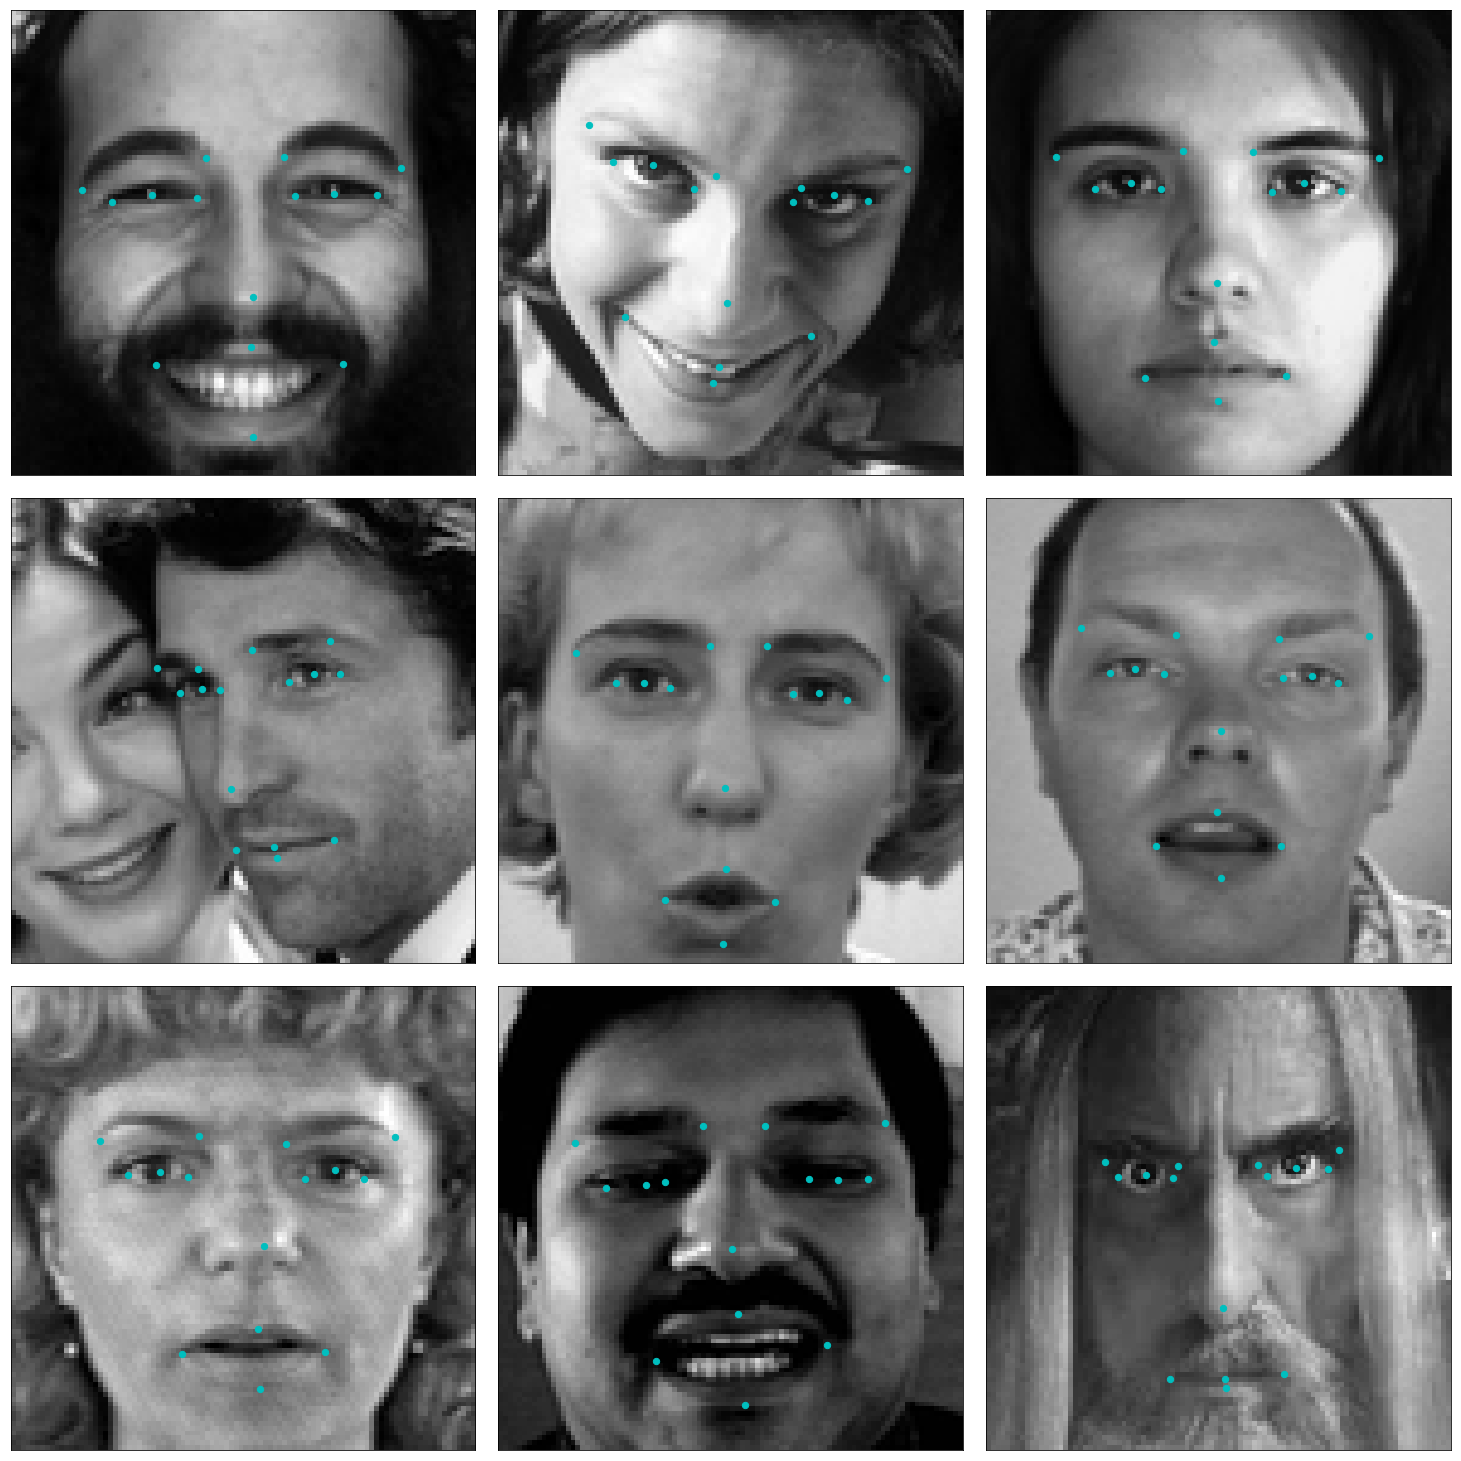

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.

### Build the CNN Architecture

In this section, I'll build a neural network for predicting the locations of facial keypoints.

The network accepts a $96 \times 96$ grayscale image as input and outputs a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.

In [16]:
# Import deep learning resources from Keras

# Build CNN architecture

# Summarize the model

---
<a id='step6'></a>

## Step 6: Compile and Train the Model

After specifying the architecture, we'll need to compile and train the model to detect facial keypoints.

In [17]:
## Compile the model

---
<a id='step7'></a>

## Step 7: Visualize the Loss and Test Predictions

Below I plot the training and validation loss of the trained neural network.

In [19]:
# Visualize the training and validation loss of the neural network

### Visualize a Subset of the Test Predictions

Below we visualize the model's predicted keypoints on a subset of the testing images.

---
<a id='step8'></a>

## Step 8: Complete the pipeline

With the work done in Sections 1 and 2 of this notebook, along with a freshly trained facial keypoint detector, we can now complete the full pipeline.  That is given a color image containing a person or persons we can now 

- Detect the faces in this image automatically
- Predict the facial keypoints in each face detected in the image
- Paint predicted keypoints on each face detected

In this Subsection we will do just this!

### Facial Keypoints Detector

Our function should perform the following steps

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

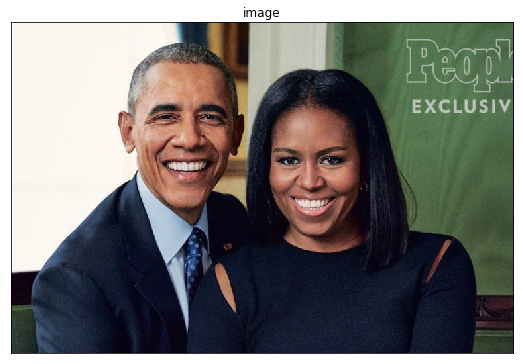

In [32]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image')
ax1.imshow(image)

In [20]:
# Use the face detection code with our trained conv-net
    
# Paint the predicted keypoints on the test image